# 連續變數特徵工程

本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請執行至少兩種特徵縮放或特徵標準化方法，並繪製出直方圖探討執行前後數值特徵的變化。
3. 請執行特徵區間化，並說明您是使用哪一種標準決定數值範圍，每個類別的範圍分別為何。
4. 請使用至少三種不同的連續變數填補技巧，將遺失值填補完成。

> 請注意：本次作業需求目標與範例程式碼相同，加上開放題會因資料集個案有不同的處理技巧，因此不額外提供解答程式碼，學員如對本次作業有問題可參考範例程式碼，或至問題討論區提問。

① 資料檢查（info / missing）
<br>② 分離連續變數
<br>③ 畫原始直方圖
<br>④ 特徵縮放（MinMax / Standard）
<br>⑤ 畫直方圖比較
<br>⑥ 特徵區間化（binning）
<br>⑦ 缺失值填補（3 種方法）

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv("train_house.csv")
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [ ]:
selected_features = [
    "SalePrice",     
    "LotFrontage", #臨街寬度    
    "LotArea", #土地面積        
    "GrLivArea", #地面以上可居住面積     
    "TotalBsmtSF", #地下室面積 
    "Neighborhood", 
    "OverallQual"
]

In [6]:
df = df[selected_features]
df.head(1)

,SalePrice,LotFrontage,LotArea,GrLivArea,TotalBsmtSF,Neighborhood,OverallQual
0,208500,65.0,8450,1710,856,CollgCr,7


## Verify datatype & missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   GrLivArea     1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   Neighborhood  1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 80.0+ KB


In [8]:
df.isnull().sum()

SalePrice         0
LotFrontage     259
LotArea           0
GrLivArea         0
TotalBsmtSF       0
Neighborhood      0
OverallQual       0
dtype: int64

## Seperate continuous features

In [10]:
continuous_features = [
    "LotFrontage",
    "LotArea",
    "GrLivArea",
    "TotalBsmtSF"
]

df_cont = df[continuous_features]
df_cont.head(1)

,LotFrontage,LotArea,GrLivArea,TotalBsmtSF
0,65.0,8450,1710,856


## Visualization (raw)

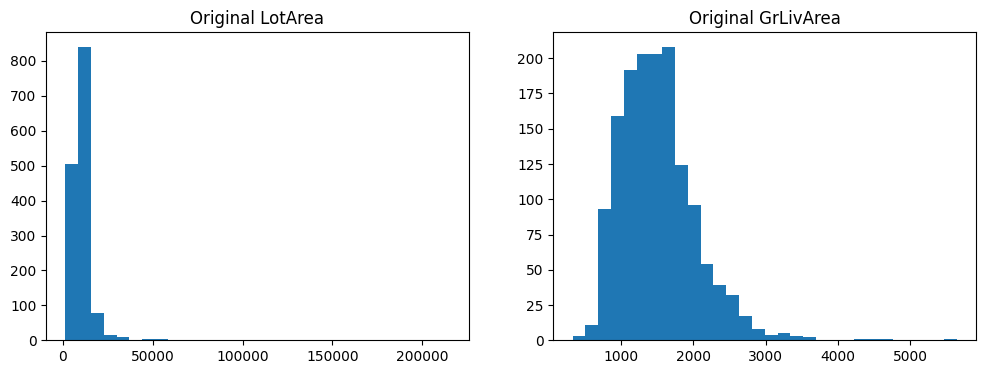

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_cont["LotArea"], bins=30)
plt.title("Original LotArea")

plt.subplot(1, 2, 2)
plt.hist(df_cont["GrLivArea"], bins=30)
plt.title("Original GrLivArea")

plt.show()

## Min-Max Scaling

In [16]:
minmax_scalar = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scalar.fit_transform(df_cont),
    columns = continuous_features
)

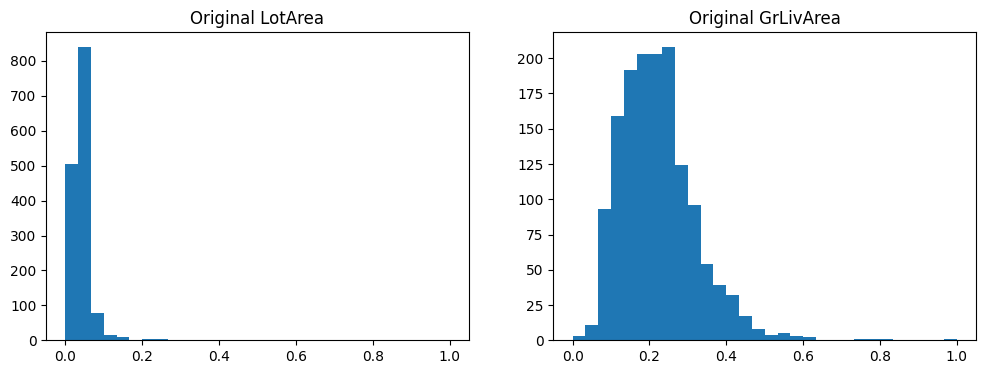

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_minmax["LotArea"], bins=30)
plt.title("Original LotArea")

plt.subplot(1, 2, 2)
plt.hist(df_minmax["GrLivArea"], bins=30)
plt.title("Original GrLivArea")

plt.show()

討論: 分布形狀不變，將範圍壓縮至0-1

## Standard Scaling

In [18]:
standard_scalar = StandardScaler()
df_standard = pd.DataFrame(
    standard_scalar.fit_transform(df_cont),
    columns=continuous_features
)

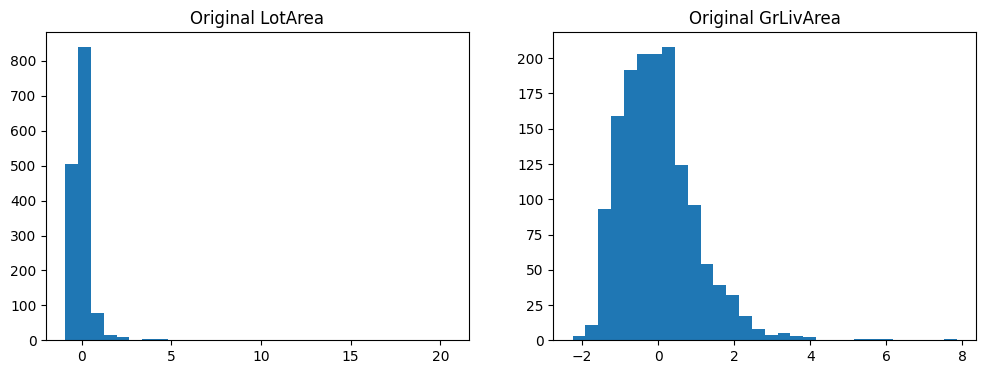

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_standard["LotArea"], bins=30)
plt.title("Original LotArea")

plt.subplot(1, 2, 2)
plt.hist(df_standard["GrLivArea"], bins=30)
plt.title("Original GrLivArea")

plt.show()

討論: 分布形狀不變，0代表原資料平均數，數值代表原資料距平均數之標準差數

## Log transformation

In [23]:
df_log = df[["LotArea", "GrLivArea"]].copy()

In [24]:
df_log["LotArea"] = np.log1p(df["LotArea"])
df_log["GrLivArea"] = np.log1p(df["GrLivArea"])

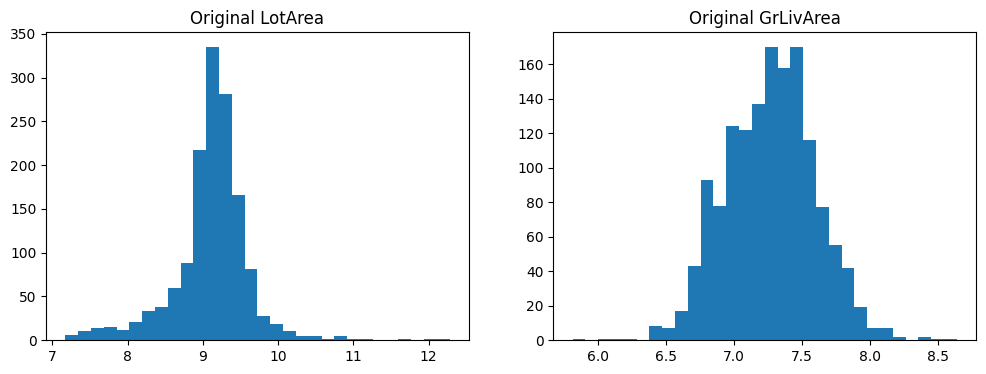

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_log["LotArea"], bins=30)
plt.title("Original LotArea")

plt.subplot(1, 2, 2)
plt.hist(df_log["GrLivArea"], bins=30)
plt.title("Original GrLivArea")

plt.show()

## Feature Binning: Using Quantile Binning

In [28]:
df["GrLivArea_bin"] = pd.qcut(
    df["GrLivArea"],
    q=3,
    labels=["small", "medium", "large"]
)

### Range & quantity of each bin

In [34]:
bins = pd.qcut(df["GrLivArea"], q=3)
bins.value_counts().sort_index()

GrLivArea
(333.999, 1242.667]     487
(1242.667, 1664.667]    486
(1664.667, 5642.0]      487
Name: count, dtype: int64

## Filling the Missing Values - LotFrontage

### Median Imputation

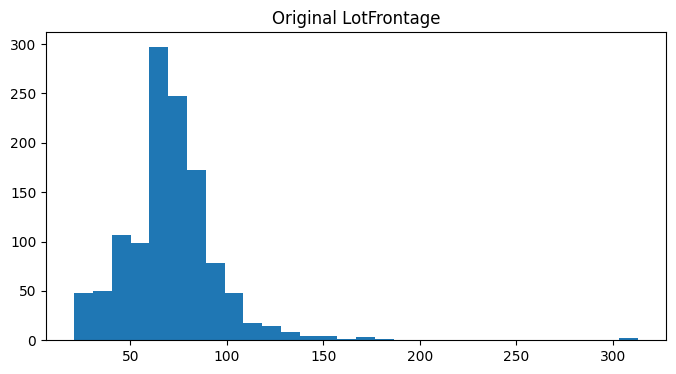

In [39]:
plt.figure(figsize=(8, 4))

plt.hist(df["LotFrontage"], bins=30)
plt.title("Original LotFrontage")

plt.show()

In [38]:
df_med = df.copy()
med_value = df_med["LotFrontage"].median()
df_med["LotFrontage"] = df_med["LotFrontage"].fillna(med_value)

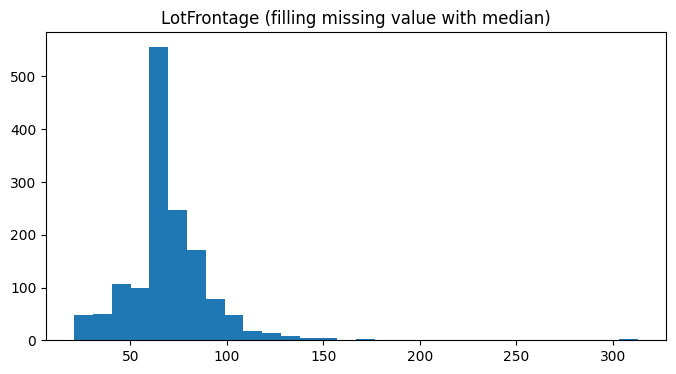

In [42]:
plt.figure(figsize=(8, 4))

plt.hist(df_med["LotFrontage"], bins=30)
plt.title("LotFrontage (filling missing value with median)")

plt.show()

### Mean Imputation

In [41]:
df_mean = df.copy()
mean_value = df_med["LotFrontage"].mean()
df_mean["LotFrontage"] = df_mean["LotFrontage"].fillna(mean_value)

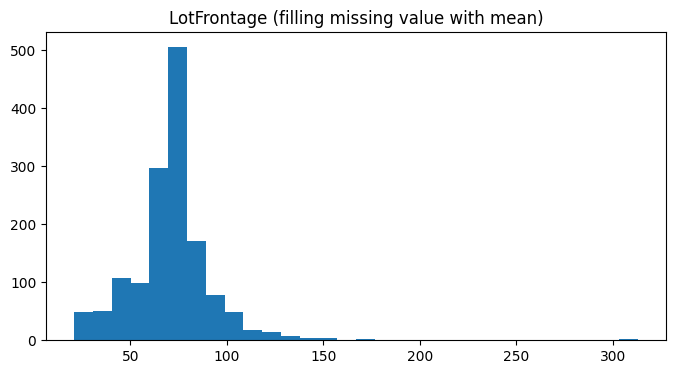

In [43]:
plt.figure(figsize=(8, 4))

plt.hist(df_mean["LotFrontage"], bins=30)
plt.title("LotFrontage (filling missing value with mean)")

plt.show()

### KNN inputer

In [44]:
from sklearn.impute import KNNImputer

In [45]:
knn_features = continuous_features

In [46]:
df_knn = df[knn_features].copy()

imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = imputer.fit_transform(df_knn)

df_knn = pd.DataFrame(df_knn_imputed, columns=knn_features)

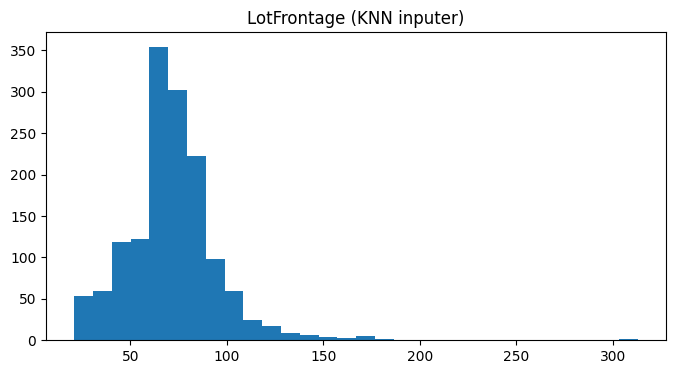

In [47]:
plt.figure(figsize=(8, 4))

plt.hist(df_knn["LotFrontage"], bins=30)
plt.title("LotFrontage (KNN inputer)")

plt.show()